In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import numpy as np

Importing The data

In [3]:
dfd=pd.read_csv("train_data.csv")
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   VLF                5000 non-null   float64
 2   VLF_PCT            5000 non-null   float64
 3   LF                 5000 non-null   float64
 4   LF_PCT             5000 non-null   float64
 5   LF_NU              5000 non-null   float64
 6   HF                 5000 non-null   float64
 7   HF_PCT             5000 non-null   float64
 8   HF_NU              5000 non-null   float64
 9   TP                 5000 non-null   float64
 10  LF_HF              5000 non-null   float64
 11  HF_LF              5000 non-null   float64
 12  SD1                5000 non-null   float64
 13  SD2                5000 non-null   float64
 14  sampen             5000 non-null   float64
 15  higuci             5000 non-null   float64
 16  datasetId          5000 

Checking for Irrelevant data

In [4]:
print(dfd['datasetId'])
cdatasetid=0
for x in dfd['datasetId']:
    if(x!=2):
        cdatasetid+=1
print(cdatasetid)

0       2
1       2
2       2
3       2
4       2
       ..
4995    2
4996    2
4997    2
4998    2
4999    2
Name: datasetId, Length: 5000, dtype: int64
0


In [5]:
colnames=[]
for i in dfd:
    colnames.append(i)

In [6]:
def plothash(arr):
    ls={}
    for i in arr:
        if(pd.isna(i)):
            continue
        if i not in ls:
            ls[i]=1
        else:
            ls[i]+=1
    return ls

Using the plothash function above we plot nature of a specific feature to check the possibility of feature engineering

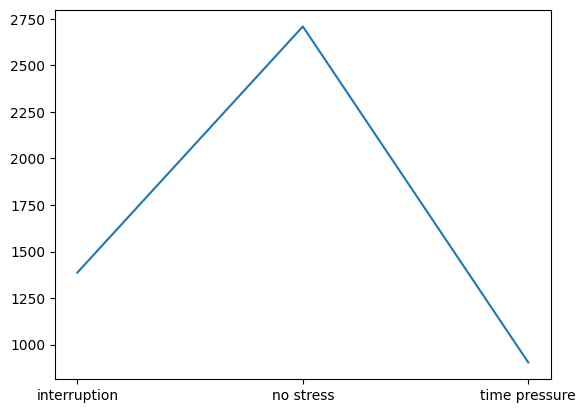

In [7]:
dicty=plothash(dfd['condition']) # Just enter the name of feature need to plot     OR      use colnames with index ranging 0-35
result=dicty.items()
data=list(result)
xaxi=[]
yaxi=[]
# print(data)
for i in data:
    xaxi.append(i[0])
    yaxi.append(i[1])
plt.plot(xaxi,yaxi)

# Since in this data set all the data of a particular feature are mostly unique the the hashplot is rather not very useful this comes in handy for binary encoding of the dataset when the data type is rather different

In [8]:
new_dfd=dfd.drop("uuid", axis="columns")

new_dfd=new_dfd.replace("interruption",0)
new_dfd=new_dfd.replace("no stress",1)
new_dfd=new_dfd.replace("time pressure",2)
# print(new_dfd["condition"])
print(new_dfd.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VLF                5000 non-null   float64
 1   VLF_PCT            5000 non-null   float64
 2   LF                 5000 non-null   float64
 3   LF_PCT             5000 non-null   float64
 4   LF_NU              5000 non-null   float64
 5   HF                 5000 non-null   float64
 6   HF_PCT             5000 non-null   float64
 7   HF_NU              5000 non-null   float64
 8   TP                 5000 non-null   float64
 9   LF_HF              5000 non-null   float64
 10  HF_LF              5000 non-null   float64
 11  SD1                5000 non-null   float64
 12  SD2                5000 non-null   float64
 13  sampen             5000 non-null   float64
 14  higuci             5000 non-null   float64
 15  datasetId          5000 non-null   int64  
 16  condition          5000 

In [9]:
xx=new_dfd.corr()
print(xx["HR"])

VLF                 -0.318167
VLF_PCT             -0.255635
LF                  -0.108677
LF_PCT               0.193269
LF_NU               -0.731351
HF                   0.650439
HF_PCT               0.665585
HF_NU                0.731351
TP                  -0.317456
LF_HF               -0.414726
HF_LF                0.709137
SD1                 -0.295949
SD2                 -0.209897
sampen              -0.304726
higuci               0.429574
datasetId                 NaN
condition           -0.091487
MEAN_RR             -0.943725
MEDIAN_RR           -0.927397
SDRR                -0.210253
RMSSD               -0.295959
SDSD                -0.295949
SDRR_RMSSD          -0.088706
HR                   1.000000
pNN25               -0.274146
pNN50               -0.126235
KURT                 0.297863
SKEW                 0.303769
MEAN_REL_RR          0.002380
MEDIAN_REL_RR        0.074035
SDRR_REL_RR          0.234775
RMSSD_REL_RR         0.505095
SDSD_REL_RR          0.505095
SDRR_RMSSD

In [10]:
x=new_dfd["HR"]
y1=new_dfd["MEAN_RR"]
y2=new_dfd["MEDIAN_RR"]

In [11]:
rfr_dfd=dfd.drop(["uuid", "datasetId"], axis=1)

USING RANDOM FOREST REGRESSOR TO TRAIN A MODEL


In [12]:
X = rfr_dfd.drop('HR', axis=1)
y = rfr_dfd['HR']
# Identifying categorial features
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#Using to transform different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a Random Forest Regressor model
model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=200, random_state=42))

# Train the model on the entire dataset to later test on test data provided
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}') #printing mse
print(f'R-squared: {r2}')

Mean Squared Error: 0.023615767627578974
R-squared: 0.9997867703730121


In [13]:
testdd=pd.read_csv("sample_test_data.csv")
resultdd=pd.read_csv("sample_output_generated.csv")
print(testdd.info())
print(resultdd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               10 non-null     object 
 1   VLF                10 non-null     float64
 2   VLF_PCT            10 non-null     float64
 3   LF                 10 non-null     float64
 4   LF_PCT             10 non-null     float64
 5   LF_NU              10 non-null     float64
 6   HF                 10 non-null     float64
 7   HF_PCT             10 non-null     float64
 8   HF_NU              10 non-null     float64
 9   TP                 10 non-null     float64
 10  LF_HF              10 non-null     float64
 11  HF_LF              10 non-null     float64
 12  SD1                10 non-null     float64
 13  SD2                10 non-null     float64
 14  sampen             10 non-null     float64
 15  higuci             10 non-null     float64
 16  datasetId          10 non-nul

In [14]:
uuidcol=testdd["uuid"]
new_data = testdd.drop(['uuid', 'datasetId'], axis=1)

# Make predictions using the trained model
new_predictions = model.predict(new_data)

result_df = pd.DataFrame({'uuid': uuidcol, 'HR': new_predictions})
result_df.to_csv('results.csv', index=False)


In [15]:
# run this to check mse for the test data replase "sample_output_generated.csv" with name of the file to compare with
rdd=pd.read_csv("results.csv")
res=pd.read_csv("sample_output_generated.csv")
mse2=mean_squared_error(rdd['predicted_HR'],res['HR'])
print(f"MSE on test data : {mse2}")

MSE on test data : 0.02614451605667013
